# Sampling from Distributions, Bar Plots, Histograms and Scatter plots

## Import and Settings

We will import `NumPy` and `matplotlib`. In addition, we will also start with some customised layout for the plot.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

## Sampling and Plotting

`NumPy` provides a utility to generate pseudo-random numbers. We shall try to sample points from various distributions. Once we have a sample, we can then represent it pictorially using suitable plots.

### Sampling: Bernoulli

Let us generate a sample of $1000$ points from the $\text{Br}(0.7)$.

In `NumPy`:

In [ ]:
X = rng.choice([0, 1],
           p = [0.3, 0.7],
           size = 1_000_000)
X.shape

(1000000,)

In [ ]:
X

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
a = np.array([1, 0, 0, 1])
a == 0

array([False,  True,  True, False])

In [ ]:
a[a == 0]

array([0, 0])

### Plotting: Bar plot

Visualise the sample using a bar plot.

In [ ]:
X[X == 1].shape[0]

700259

700259 299741


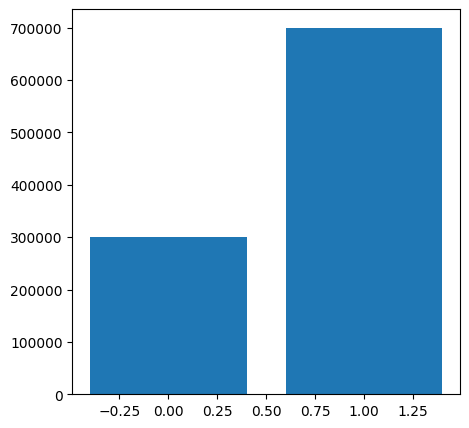

In [ ]:
n_ones = X[X == 1].shape[0]
n_zeros = X[X == 0].shape[0]
print(n_ones, n_zeros)
plt.bar([0, 1], [n_zeros, n_ones]);

### Sampling: Gaussian

Generate a sample of $10000$ points from $\mathcal{N}(1, 4)$.

In [ ]:
rng.normal?

In [ ]:
X = rng.normal(1, 2, size = 1_000_000)
X.shape

(1000000,)

### Plotting: Histogram

Visualise the sample using a histogram.

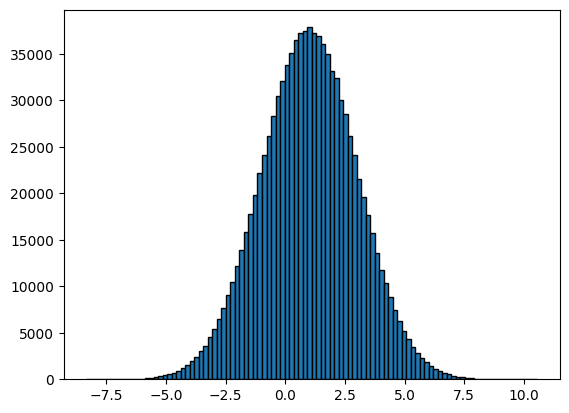

In [ ]:
plt.hist(X, bins = 100, edgecolor = 'black');

### Sampling: Bivariate Gaussian

Sample 1000 points from the following Bivariate Gaussian:

$$
\mathcal{N} \left( \begin{bmatrix}1 \\ 2\end{bmatrix}, \begin{bmatrix}1 & 0\\0 & 5\end{bmatrix} \right)
$$

In [ ]:
mu = np.array([1, 2])
cov = np.array([[1, 0], [0, 5]])
X = rng.multivariate_normal(mu, cov, size = 1_000_000)
X.shape

(1000000, 2)

### Plotting: Scatter plot

Visualise the sample using a scatter plot. Try to zoom out of the plot and see what the shape of the distribution looks like. Change the values of the covariance matrix and observe how the shape changes.

(-15.0, 15.0)

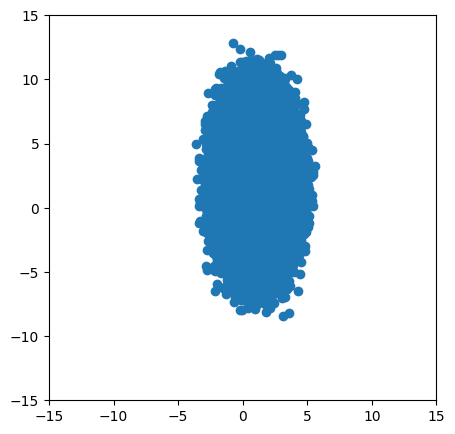

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(X[:, 0], X[:, 1])
plt.xlim([-15, 15])
plt.ylim([-15, 15])

[1.00064108 5.00233113]


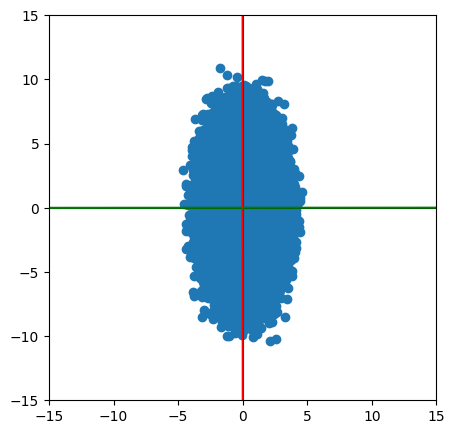

In [ ]:
## PCA
# Data - n x d
n, d = X.shape
# Centering
X -= X.mean(axis = 0)
# Covariance Matrix
C = X.T @ X / n
# Eigenvalues and Eigenvectors
eigval, eigvec = np.linalg.eigh(C)
# P.C
w_1, w_2 = eigvec[:, -1], eigvec[:, 0]
print(eigval)
# Visualize
plt.scatter(X[:, 0], X[:, 1])
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.axhline(color = 'black')
plt.axvline(color = 'black')
# PC
x = np.linspace(-15, 15)
y_1 = w_1[1] / w_1[0] * x
plt.plot(x, y_1, color = 'red', label = 'PC-1')
y_2 = w_2[1] / w_2[0] * x
plt.plot(x, y_2, color = 'green', label = 'PC-2');

### Estimating the sample covariance matrix

Estimate the sample covaraince matrix using the above data. See how close it is to the population covariance matrix.

## GMM

Draw 1000 samples from a Gaussian Mixture Model (GMM) that has three components, with mixture probabilities $[0.2, 0.3, 0.5]$ and means $[0, 5, 10]$. The standard deviation of all three Gaussians is the same and is equal to $1$. Visualise the samples using a histogram.

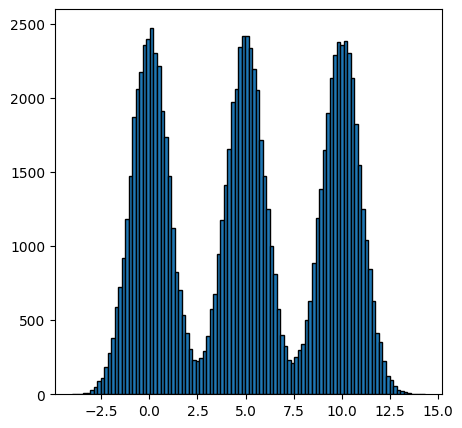

In [ ]:
pi = np.array([1 / 3, 1 / 3, 1 / 3])
mu = np.array([0, 5, 10])
sigma = 1

n = 100_000
X = np.zeros(n)
for i in range(n):
    # First choose a component
    comp = rng.choice([0, 1, 2], p = pi)
    # Sample a point from the component
    X[i] = rng.normal(mu[comp], sigma)

plt.hist(X, bins = 100, edgecolor = 'black');